# King County Housing Analysis

## Perspective:

Property adviser

## Objectives:

- how do internal property features affect housing price and to what extent
- Is the size of your house more valuable in higher priced zipcodes
- how geographic features affect housing price

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# Set plot space as inline for inline plots display
%matplotlib inline

## Load data and check data format

In [2]:
##Load csv file and convert ? to NaN
housing_df = pd.read_csv('kc_house_data.csv', na_values = '?')

In [3]:
housing_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
housing_df.shape

(21597, 21)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


## Data cleaning

### checking missing values

In [6]:
housing_df.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [7]:
housing_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     454
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Replace missing values with median and mode values

In [8]:
list_missing_value_columns_1 = ['waterfront', 'view']
list_missing_value_columns_2 = ['yr_renovated', 'sqft_basement']


for value in list_missing_value_columns_1:
    mode_value = housing_df[value].mode()[0]
    housing_df[value].fillna(mode_value, inplace=True)
    
for value in list_missing_value_columns_2:
    median_value = housing_df[value].median()
    housing_df[value].fillna(median_value, inplace=True)

housing_df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
# double check if anything is missing
housing_df.isna().any().any()

False

### Drop useless column

There seems quite a few duplicated id number with different information so for better understanding we will drop them

In [10]:
housing_df.drop(columns='id', inplace=True)

In [11]:
housing_df.head(50)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


For now data cleaning is being done, for categorical variables we will create dummy variables in later.

## Data visualization

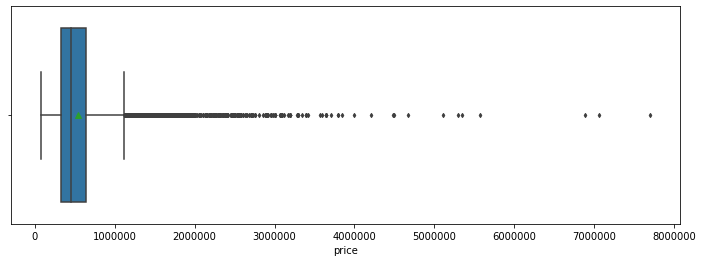

In [12]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

From the figure below we can see most of the housing price ranges in the number between 0-1 millions but there're few outliers.

### Check Outliers

In [13]:
indexNames = housing_df[(housing_df['price'] >= 6000000)].index
 
housing_df.drop(indexNames, inplace=True)

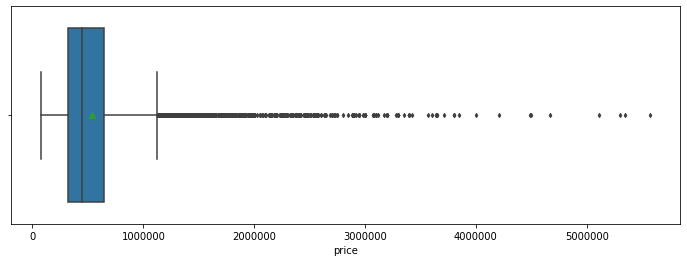

In [14]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', 
            data = housing_df, 
            orient = 'h', 
            width = 0.8, 
            fliersize = 3, 
            showmeans=True, 
            ax = ax)
plt.show()

## Question 1: Is the size of your house more valuable in higher priced zipcodes

- Create a new variable called 'meanzip' which takes the average of all the house prices for each zipcode
- Look at the value of having a relatively bigger house changes in importance between low prices vs high priced zipcodes

### Create a zipcode variable

In [59]:
zips = housing_df['zipcode'].value_counts().index
mean_of_zips = {}
for z in zips:
    ziphouses = housing_df[housing_df['zipcode'] == z]['price']
    mean_of_zips[z] = ziphouses.mean()

In [60]:
housing_df['meanzip'] = housing_df['zipcode'].map(lambda x: (mean_of_zips[x]) )

In [61]:
f = 'price~sqft_living'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~meanzip'
model = smf.ols(formula=f, data=housing_df).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

The R^2 value for price~sqft_living is 0.488
The R^2 value for price~grade is 0.455
The R^2 value for price~meanzip is 0.415


From this we can see that **Sqft_living**, **Grade** and **Meanzip** explain the highest percentage of the variation in Price. 
From this information we can test if sqft_living changes when you move through house price zipocde.

We will next test if sqft_living and grade explains the price in low priced zipocdes and high priced zipcodes.

### Sqft_living and Grade in Low Priced Zipcodes

In [62]:
bottom_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],10)
cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ten_percent_zipcodes]
print("There are", len(cheap_houses['meanzip']),
      "houses are from a zipcode with an average price lower than", round(bottom_ten_percent_zipcodes,3), "(log).")

f = 'price~sqft_living'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=cheap_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

There are 1926 houses are from a zipcode with an average price lower than 296187.98 (log).
The R^2 value for price~sqft_living is 0.631
The R^2 value for price~grade is 0.471


### Sqft_living and Grade in High Priced Zipcodes

In [63]:
top_ten_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
expensive_houses = housing_df.loc[housing_df['meanzip'] > top_ten_percent_zipcodes]
print("There are", len(expensive_houses['meanzip']),
      "houses are from a zipcode with an average price higher than", round(top_ten_percent_zipcodes,3), "(log).")

f = 'price~sqft_living'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

f = 'price~grade'
model = smf.ols(formula=f, data=expensive_houses).fit()
print ('The R^2 value for',f,'is', round(model.rsquared,3))

There are 2039 houses are from a zipcode with an average price higher than 810289.696 (log).
The R^2 value for price~sqft_living is 0.627
The R^2 value for price~grade is 0.491


In [64]:
bottom_ninety_percent_zipcodes = np.percentile(housing_df['meanzip'],90)
all_cheap_houses = housing_df.loc[housing_df['meanzip'] < bottom_ninety_percent_zipcodes]

**So it seems that houses in higher priced zipcodes are substantially affected by the size of the house.**
Now lets plot individual zipcodes on a scatter graph.

Zipcode: 98112


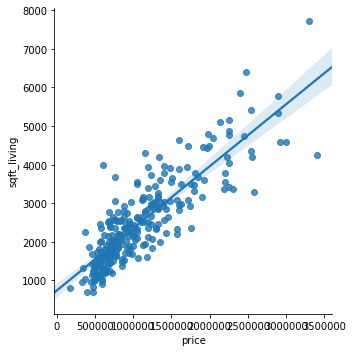

Zipcode: 98119


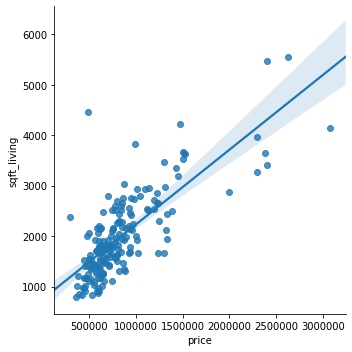

Zipcode: 98039


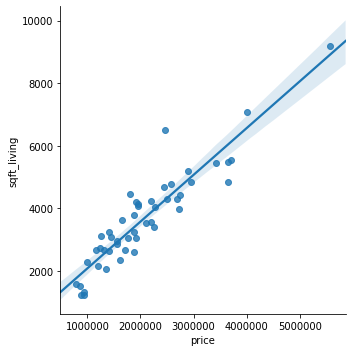

Zipcode: 98004


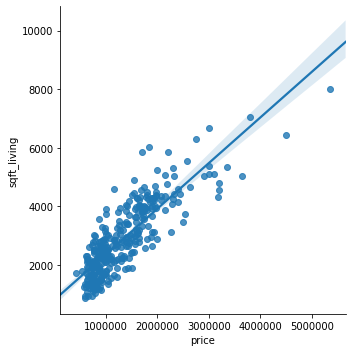

Zipcode: 98102


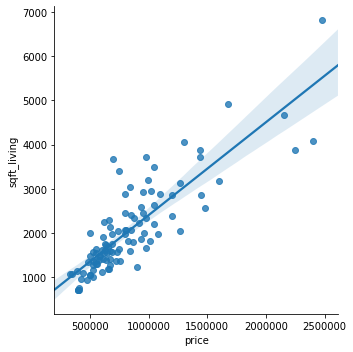

Zipcode: 98006


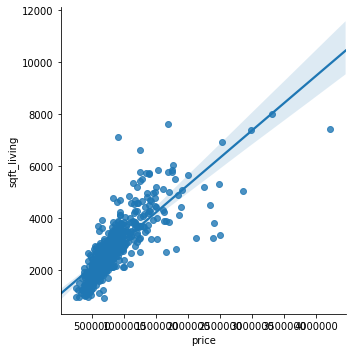

Zipcode: 98040


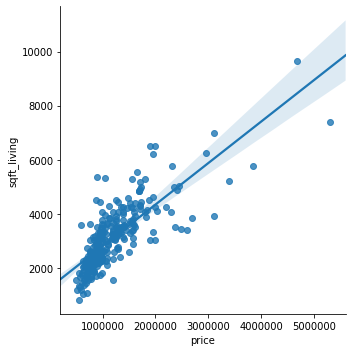

Zipcode: 98105


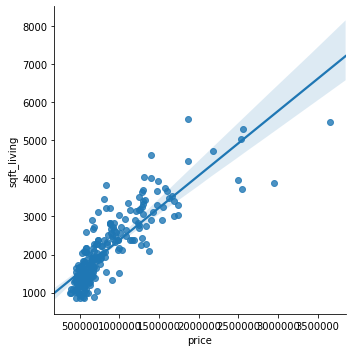

Zipcode: 98109


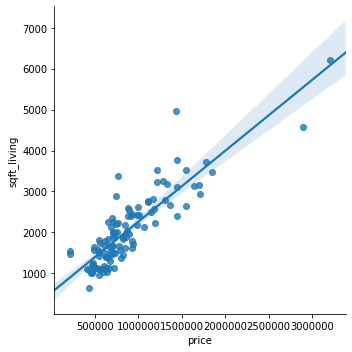

In [65]:
exp_zipcodes = list(set(expensive_houses['zipcode']))

numbers = list(range(0, len(exp_zipcodes)))
new_list = []
for num in numbers:
    zipc = expensive_houses.loc[expensive_houses['zipcode'] == exp_zipcodes[num] ]
    sns.lmplot(x="price", y="sqft_living", data=zipc)    
    plt.title(print("Zipcode:",exp_zipcodes[num]))
    plt.show(fig)

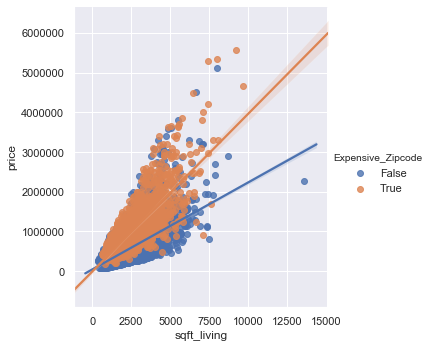

In [70]:
housing_df['Expensive_Zipcode'] = housing_df['meanzip'] > np.percentile(housing_df['meanzip'],90)
housing_df

housing_df['Ex'] = housing_df['meanzip'] > top_ten_percent_zipcodes
import seaborn as sns; sns.set(color_codes=True)
sns.lmplot(x="sqft_living", y="price", hue= 'Expensive_Zipcode', data=housing_df)

### Q1 summary
- We started our analysis by creating a new variable called 'Meanzip'. This variable found the average house price of each zipcode. This helped understand if a certain zip code was a relatively low or high house priced area 
- We then carried out linear regression on all our variables against Price. We found that sqft_living (0.455), grade (0.496) and mean zip (0.529) all returned R^2 values above 0.4
- From here, We decided that it would be worth testing if R^2 value for sqft_living was higher when We looked at just high priced housing zip codes.
- We looked at all houses where they were in a zip code that had an average house price above the 90th percentile. From a dataset 1708 houses the R^2 value was 0.686
<br>

**Suggestions:**
- Test sqft_living against price in the high priced housing areas on a new data set.
- With extra data it would be interesting to find the cost of renovations/extensions on a house versus the potential increase in price

## Question 2: How do geographic features affect housing price?

### Data visualization

The graph below shows that the geographic location and natural features are important denominators of price in King County. The price for the square footage of constructed area (sqft_living) increases according to the closeness of the water bodies. Moreover, the presence of a waterfront, particularly increases the price of the square footage.

<function matplotlib.pyplot.show(*args, **kw)>

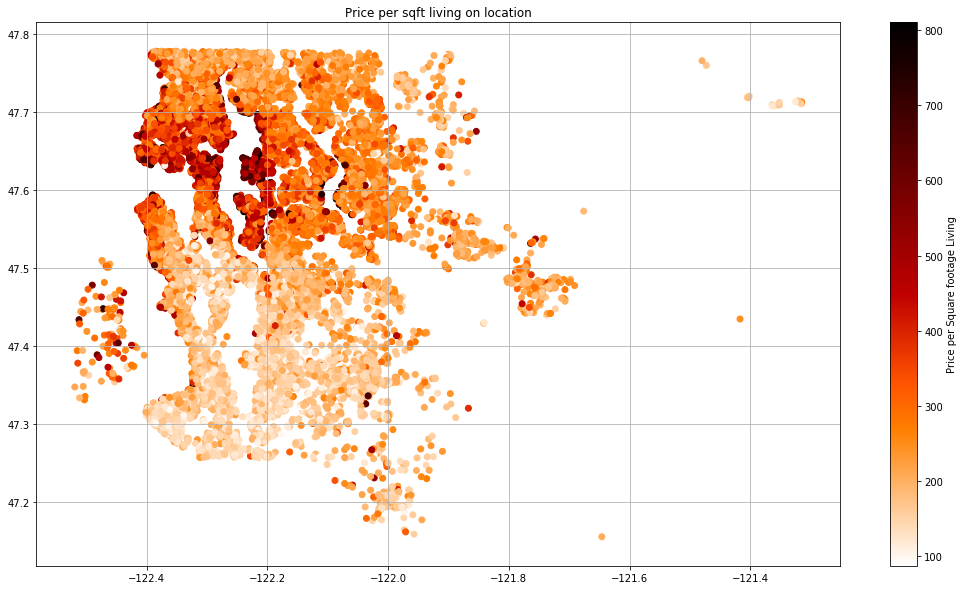

In [15]:
plt.figure(figsize=(18,10))
plt.scatter(housing_df['long'], housing_df['lat'], c=housing_df['price']/housing_df['sqft_living'], cmap='gist_heat_r')
cbar = plt.colorbar()
cbar.set_label('Price per Square footage Living')
plt.grid(which='both')
plt.title('Price per sqft living on location')
plt.show

### Multi linear regression model

Multiple regression analysis investigating the effects of square footage of living area (sqft_living); waterfront, latitude and longitude on price, for properties in the King County

In [16]:
X = housing_df[['sqft_living', 'lat', 'long', 'waterfront']]
y = housing_df['price']

# result = stepwise_selection(X, y, verbose = True)
# print('resulting features:')
# print(result)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     8546.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:57:50   Log-Likelihood:            -2.9659e+05
No. Observations:               21594   AIC:                         5.932e+05
Df Residuals:                   21589   BIC:                         5.932e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.429e+07    1.4e+06    -45.918      0.000    -6.7e+07   -6.15e+07
sqft_living   271.4340      1.735    156.444      0.000     268.033     274.835
lat          6.877e+05   1.11e+04     61.869      0.000    6.66e+05     7.1e+05
long        -2.582e+05   1.13e+04    -22.869      0.000    -2.8e+05   -2.36e+05
waterfront   8.408e+05   1.87e+04     44.853      0.000    8.04e+05    8.78e+05
==============================================================================
Omnibus:                    12780.354   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           298229.116
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      20.557   Cond. No.                     2.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Q2 Summary

We started our analysis  visualizing the data in a scatter plot heat map, in order to observe the locations in which square footage of living (or constructed area) are higher for in King County.  This helped us understand what were the areas in which one must pay premium prices per living square footage.                                                                                                                                                                       Moreover, it was possible to observe that the properties with highest values were situated near a body of water. 
We then carried out multiple regression analysis, the variables we used were: price as the dependent variable, which returned R^2 (0.647). All independent variables had a significant effect on pricing. With Square footage of living area being the strongest predictive variable.  
<br>
**Suggestions**
<br>
Compare neighborhoods with proximity to water bodies, in order to find out where one can get the best value for money, and keeping premium features such as waterfront. 

## Question 3: As a property adviser, how does internal property features affect housing price? 

In this report, we will consider sqft_living, sqft_lot, sqft_above, sqft_basement as continuous variables, bathrooms, bedrooms, floors, grade as categorical variables.

### Multicollinearity of Features

Plot matrix to check multicollinearity of features

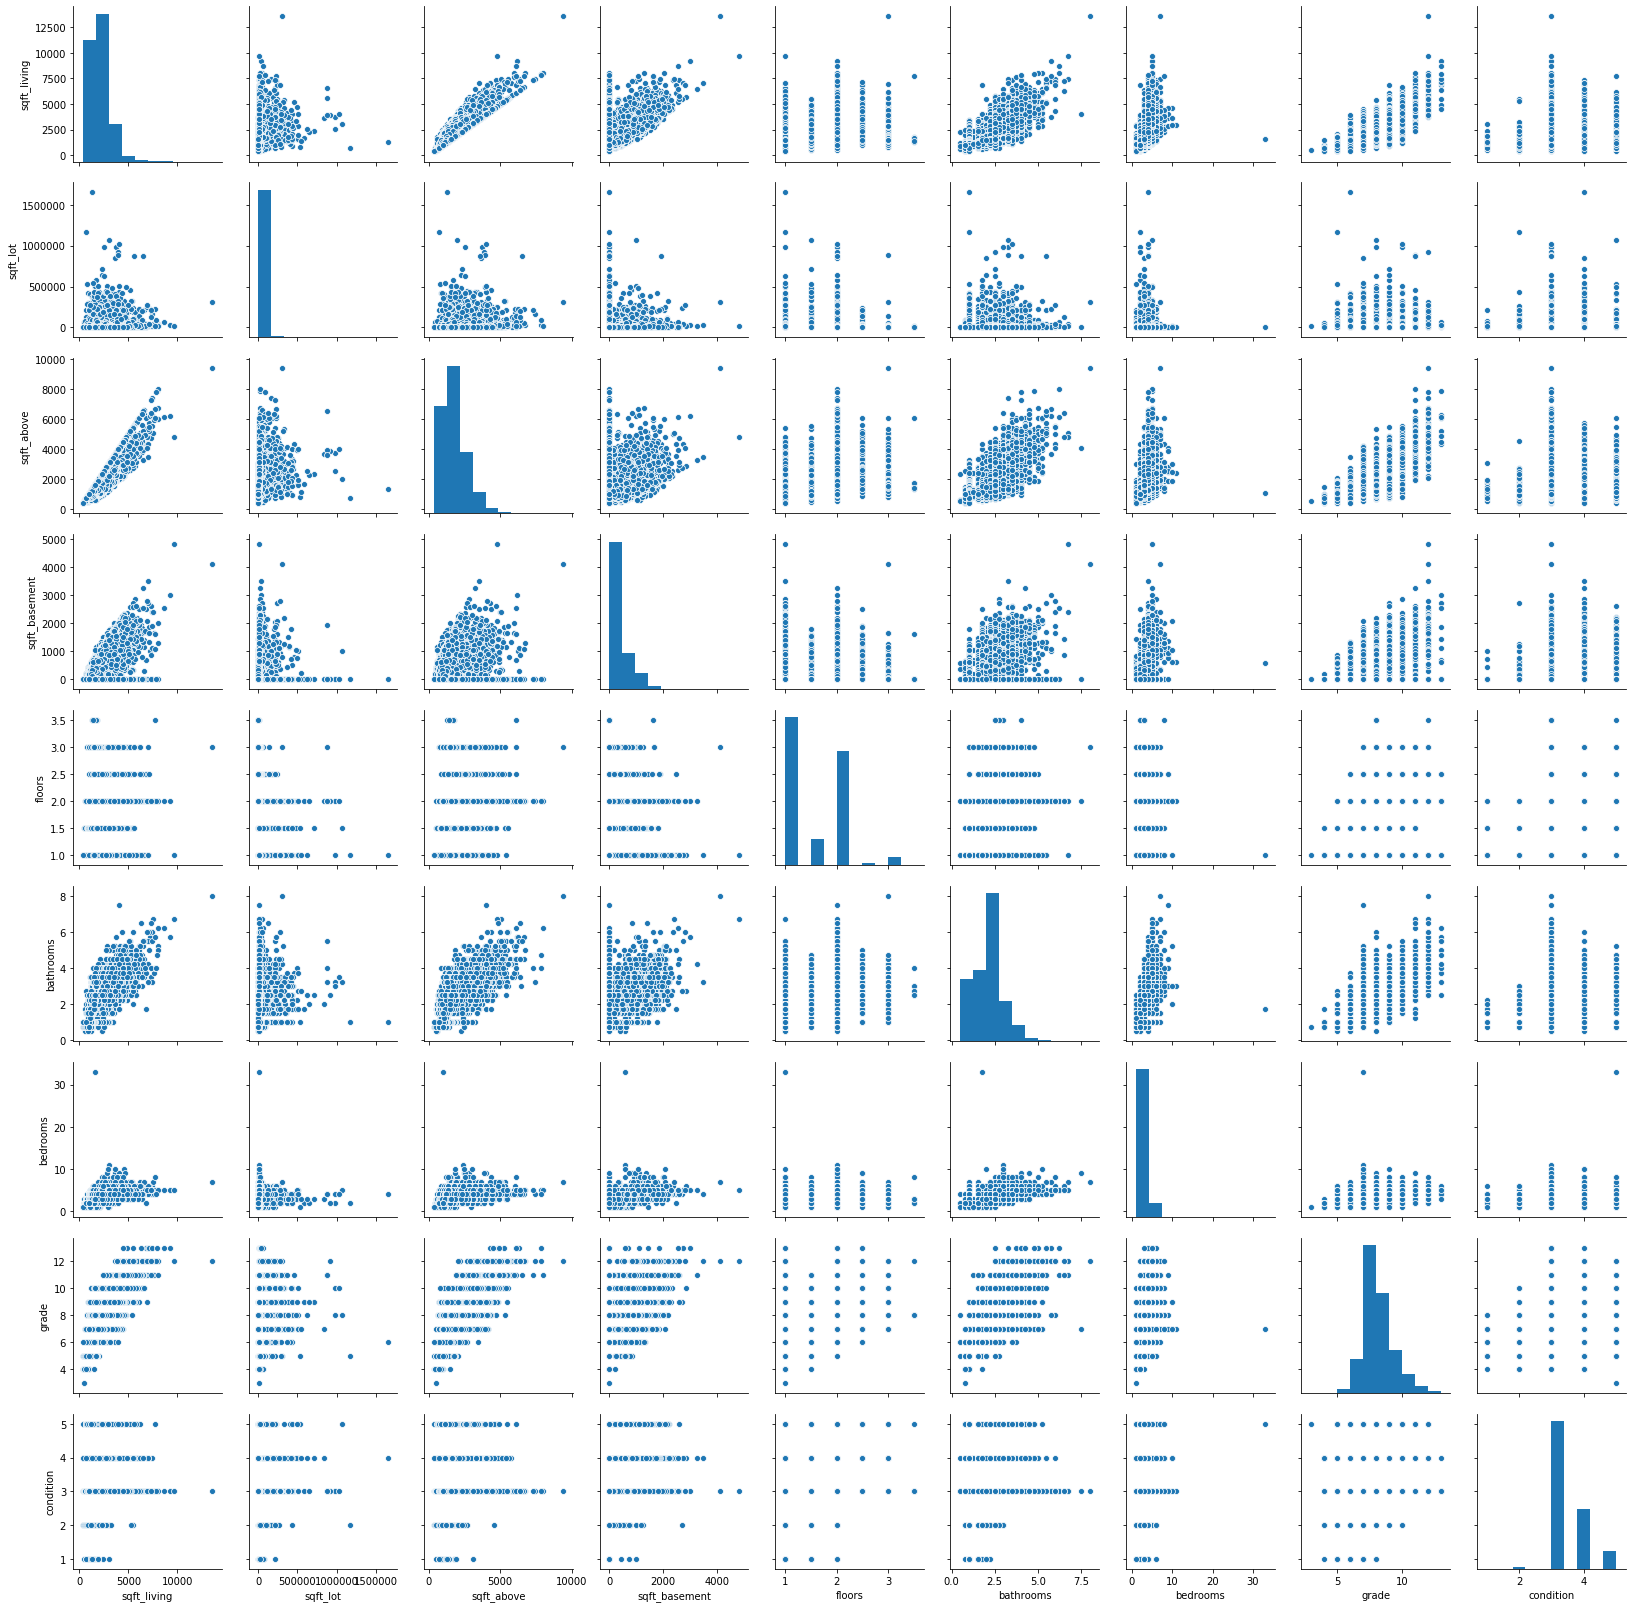

In [15]:
x2_cols=['sqft_living', 
         'sqft_lot', 
         'sqft_above', 
         'sqft_basement', 
         'floors', 
         'bathrooms', 
         'bedrooms', 
         'grade', 
         'condition']
sns.pairplot(housing_df[x2_cols])

In [16]:
housing_df[x2_cols].corr()

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,1.000000,0.174006,0.875353,0.425837,0.354499,0.754549,0.578788,0.763128,-0.059771
sqft_lot,0.174006,1.000000,0.184512,0.014808,-0.004881,0.088306,0.032351,0.114647,-0.008816
sqft_above,0.875353,0.184512,1.000000,-0.056506,0.524989,0.684802,0.478941,0.755815,-0.159503
sqft_basement,0.425837,0.014808,-0.056506,1.000000,-0.243239,0.275936,0.296335,0.163816,0.168675
floors,0.354499,-0.004881,0.524989,-0.243239,1.000000,0.502951,0.177600,0.458662,-0.264141
bathrooms,0.754549,0.088306,0.684802,0.275936,0.502951,1.000000,0.513968,0.664911,-0.126859
bedrooms,0.578788,0.032351,0.478941,0.296335,0.177600,0.513968,1.000000,0.355701,0.026523
grade,0.763128,0.114647,0.755815,0.163816,0.458662,0.664911,0.355701,1.000000,-0.147046
condition,-0.059771,-0.008816,-0.159503,0.168675,-0.264141,-0.126859,0.026523,-0.147046,1.000000


### Correlation check

In [17]:
abs(housing_df[x2_cols].corr()) > 0.75

,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bathrooms,bedrooms,grade,condition
sqft_living,True,False,True,False,False,True,False,True,False
sqft_lot,False,True,False,False,False,False,False,False,False
sqft_above,True,False,True,False,False,False,False,True,False
sqft_basement,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False
bathrooms,True,False,False,False,False,True,False,False,False
bedrooms,False,False,False,False,False,False,True,False,False
grade,True,False,True,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


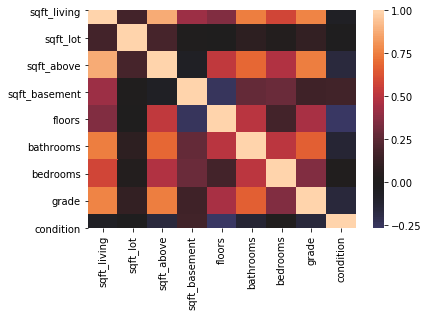

In [18]:
sns.heatmap(housing_df[x2_cols].corr(), center=0);

In [89]:
housing_df = housing_df.drop('sqft_living', axis=1)

In [22]:
x3_cols=['sqft_lot', 'sqft_above', 'sqft_basement','floors', 'bathrooms', 'bedrooms', 'grade', 'condition']
X = housing_df[x3_cols]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     3445.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:34:09   Log-Likelihood:            -2.9796e+05
No. Observations:               21594   AIC:                         5.959e+05
Df Residuals:                   21585   BIC:                         5.960e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.881e+05   1.79e+04    -43.984      0.000   -8.23e+05   -7.53e+05
sqft_lot         -0.2492      0.040     -6.195      0.000      -0.328      -0.170
sqft_above      185.8241      3.828     48.545      0.000     178.321     193.327
sqft_basement   245.5440      4.827     50.874      0.000     236.084     255.004
floors        -1729.0438   4059.766     -0.426      0.670   -9686.486    6228.398
bathrooms     -1.627e+04   3592.671     -4.528      0.000   -2.33e+04   -9224.643
bedrooms      -4.005e+04   2220.900    -18.033      0.000   -4.44e+04   -3.57e+04
grade          1.172e+05   2332.654     50.248      0.000    1.13e+05    1.22e+05
condition      5.968e+04   2609.166     22.874      0.000    5.46e+04    6.48e+04
==============================================================================
Omnibus:                    13837.913   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           358277.105
Skew:                           2.667   Prob(JB):                         0.00
Kurtosis:                      22.229   Cond. No.                     4.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Delete bedrooms and sqft_basement to achieve a good result with relatively low number of features

### Continuous Variables for internal features

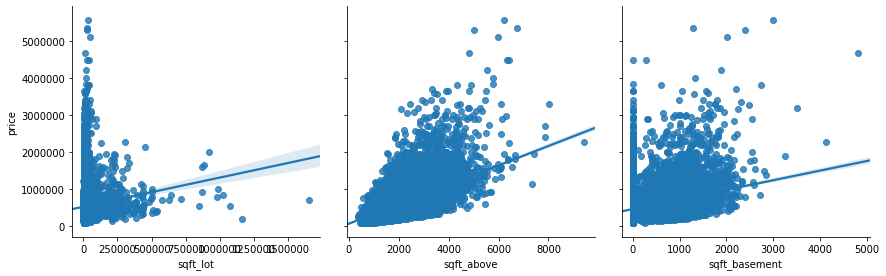

In [23]:
internal_factors = ['sqft_lot','sqft_above','sqft_basement']
sns.pairplot(data=housing_df,
                  y_vars=['price'],
                  x_vars=internal_factors,
                  kind = 'reg',
                  height=4)

### Feature normalization

In [24]:
x_cols = ['sqft_lot','sqft_above','sqft_basement','price']

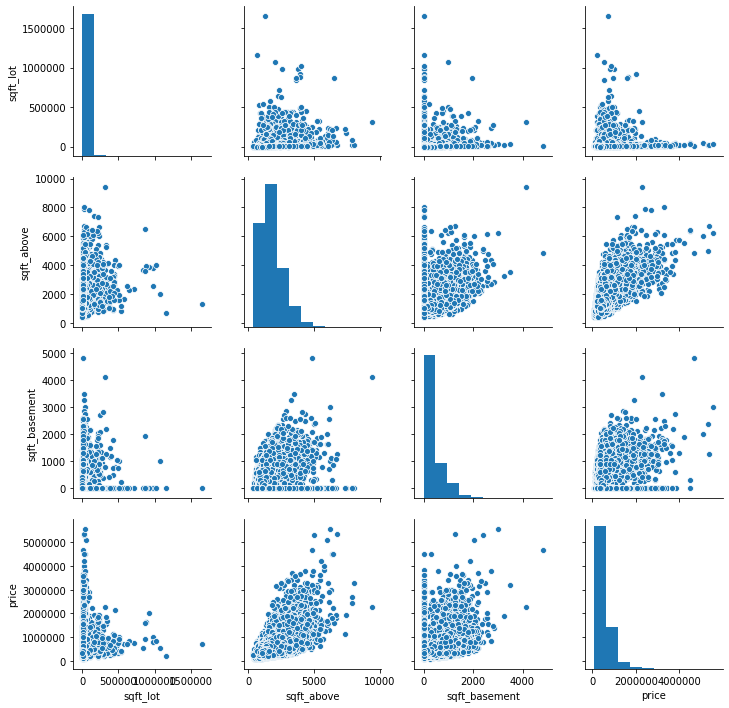

In [25]:
sns.pairplot(housing_df[x_cols])

### Log transformation

In [26]:
non_normal = ['sqft_lot', 'sqft_above', 'price']
for variable in non_normal:
    housing_df[variable] = housing_df[variable].map(lambda x: np.log(x))


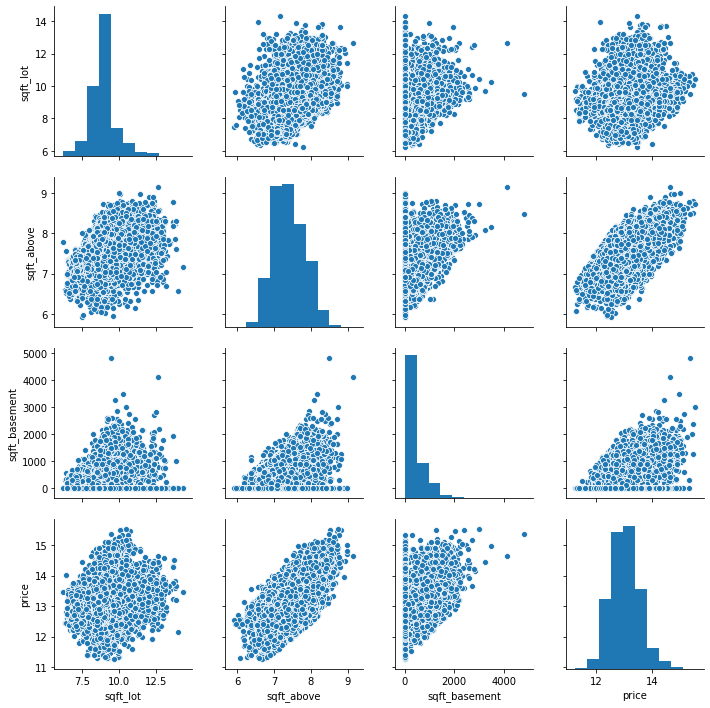

In [27]:
sns.pairplot(housing_df[x_cols])

from the the figures showing above, we can see the sqft_living and sqft_above look like having a stronger impact on the housing price, and we will analyse this when we test for the linear regression model.

### Categorical Variables for internal features

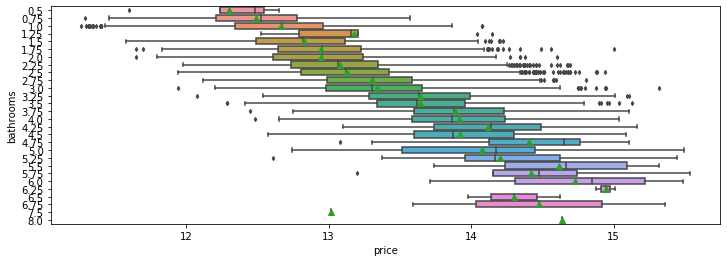

In [28]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'bathrooms', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

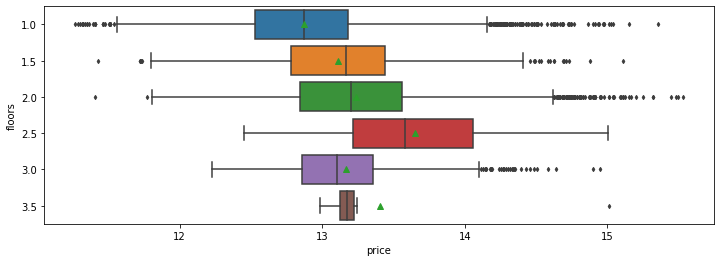

In [29]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'floors', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

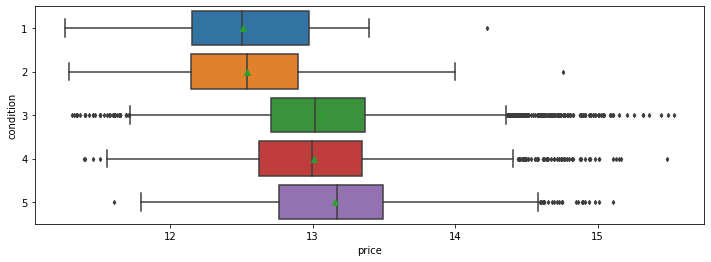

In [30]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'condition', 
            x = 'price', 
            data = housing_df,
            width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

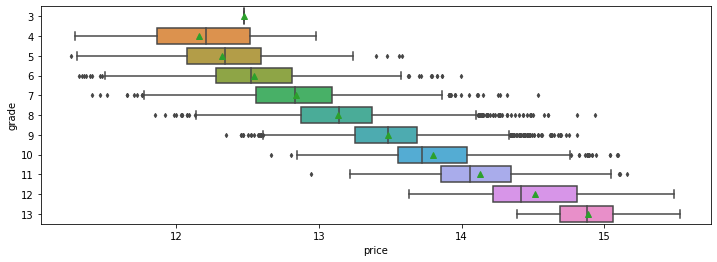

In [31]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(y = 'grade', 
            x = 'price', 
            data = housing_df,width = 0.8,
            orient = 'h', 
            showmeans = True, 
            fliersize = 3, 
            ax = ax)
plt.show()

From the figures above, it shows grade has a strong impact with housing price.

### Creat dummy variables for internal categorical variables

In [32]:
floor_dummies = pd.get_dummies(housing_df['floors'], prefix='floors', drop_first=True)
bathrooms_dummies = pd.get_dummies(housing_df['bathrooms'], prefix='bath', drop_first=True)
condition_dummies = pd.get_dummies(housing_df['condition'], prefix='con', drop_first=True)
grade_dummies = pd.get_dummies(housing_df['grade'], prefix='grade', drop_first=True)

housing_df = housing_df.drop(['floors','bathrooms','condition','grade'], axis=1)

housing_df = pd.concat([housing_df, 
                        floor_dummies, 
                        bathrooms_dummies, 
                        condition_dummies, 
                        grade_dummies
                        ], axis=1)
housing_df.head()

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,view,sqft_above,sqft_basement,yr_built,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,10/13/2014,12.309982,3,1180,8.639411,0.0,0.0,7.073270,0.0,1955,...,0,0,0,1,0,0,0,0,0,0
1,12/9/2014,13.195614,3,2570,8.887653,0.0,0.0,7.682482,400.0,1951,...,0,0,0,1,0,0,0,0,0,0
2,2/25/2015,12.100712,2,770,9.210340,0.0,0.0,6.646391,0.0,1933,...,0,0,1,0,0,0,0,0,0,0
3,12/9/2014,13.311329,4,1960,8.517193,0.0,0.0,6.956545,910.0,1965,...,0,0,0,1,0,0,0,0,0,0
4,2/18/2015,13.142166,3,1680,8.997147,0.0,0.0,7.426549,0.0,1987,...,0,0,0,0,1,0,0,0,0,0


In [33]:
housing_df.dtypes

date            object
price          float64
bedrooms         int64
sqft_living      int64
sqft_lot       float64
                ...   
grade_9          uint8
grade_10         uint8
grade_11         uint8
grade_12         uint8
grade_13         uint8
Length: 62, dtype: object

In [34]:
housing_df.dtypes[:50]

date              object
price            float64
bedrooms           int64
sqft_living        int64
sqft_lot         float64
waterfront       float64
view             float64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
floors_1.5         uint8
floors_2.0         uint8
floors_2.5         uint8
floors_3.0         uint8
floors_3.5         uint8
bath_0.75          uint8
bath_1.0           uint8
bath_1.25          uint8
bath_1.5           uint8
bath_1.75          uint8
bath_2.0           uint8
bath_2.25          uint8
bath_2.5           uint8
bath_2.75          uint8
bath_3.0           uint8
bath_3.25          uint8
bath_3.5           uint8
bath_3.75          uint8
bath_4.0           uint8
bath_4.25          uint8
bath_4.5           uint8
bath_4.75          uint8
bath_5.0           uint8
bath_5.25          uint8


In [35]:
housing_df.keys()

Index(['date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5', 'bath_0.75',
       'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75', 'bath_2.0',
       'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0', 'bath_3.25',
       'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 'bath_4.5',
       'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_5.75',
       'bath_6.0', 'bath_6.25', 'bath_6.5', 'bath_6.75', 'bath_7.5',
       'bath_8.0', 'con_2', 'con_3', 'con_4', 'con_5', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13'],
      dtype='object')

## Single Linear Regression

R-Squared: 0.3421564219933442
Intercept     7.720103
sqft_above    0.720458
dtype: float64


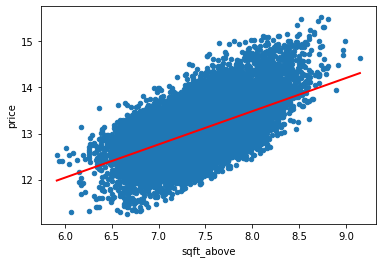

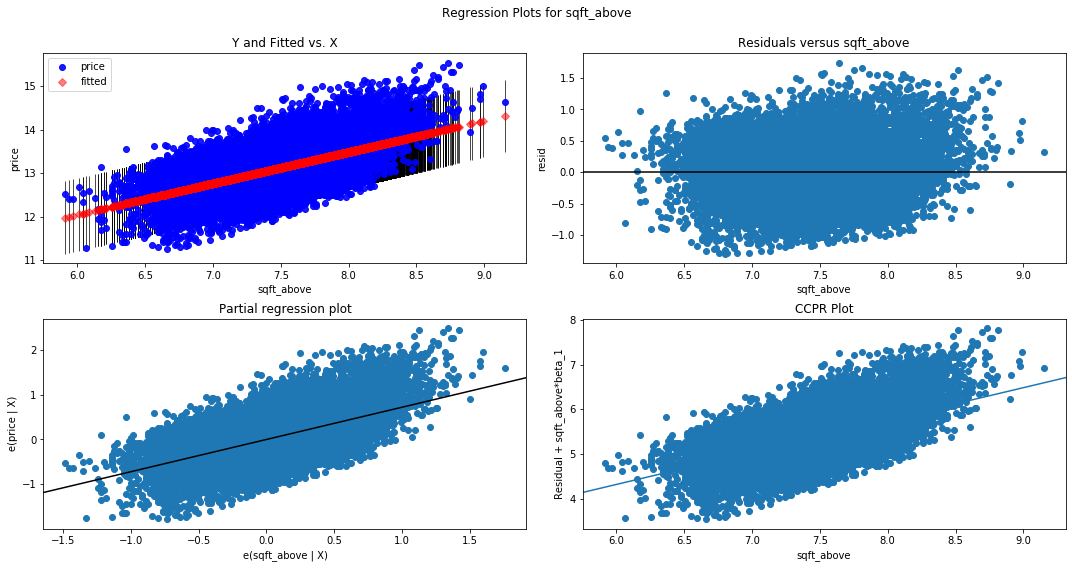

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


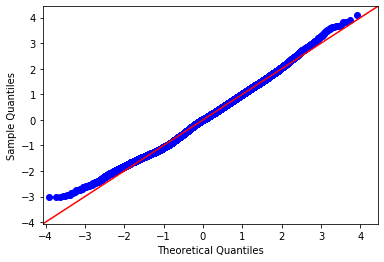

In [36]:
f = 'price~sqft_above'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_above': [housing_df.sqft_above.min(), housing_df.sqft_above.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_above', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                 1.123e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:35:30   Log-Likelihood:                -12229.
No. Observations:               21594   AIC:                         2.446e+04
Df Residuals:                   21592   BIC:                         2.448e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7201      0.050    153.305      0.000       7.621       7.819
sqft_above     0.7205      0.007    105.974      0.000       0.707       0.734
==============================================================================
Omnibus:                      136.314   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.267
Skew:                           0.184   Prob(JB):                     2.57e-30
Kurtosis:                       2.871   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.01888903411819931
Intercept    12.327890
sqft_lot      0.080086
dtype: float64


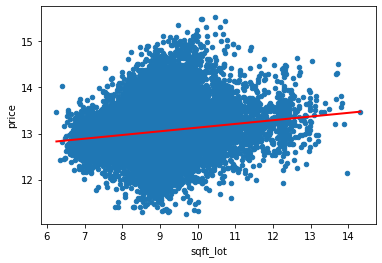

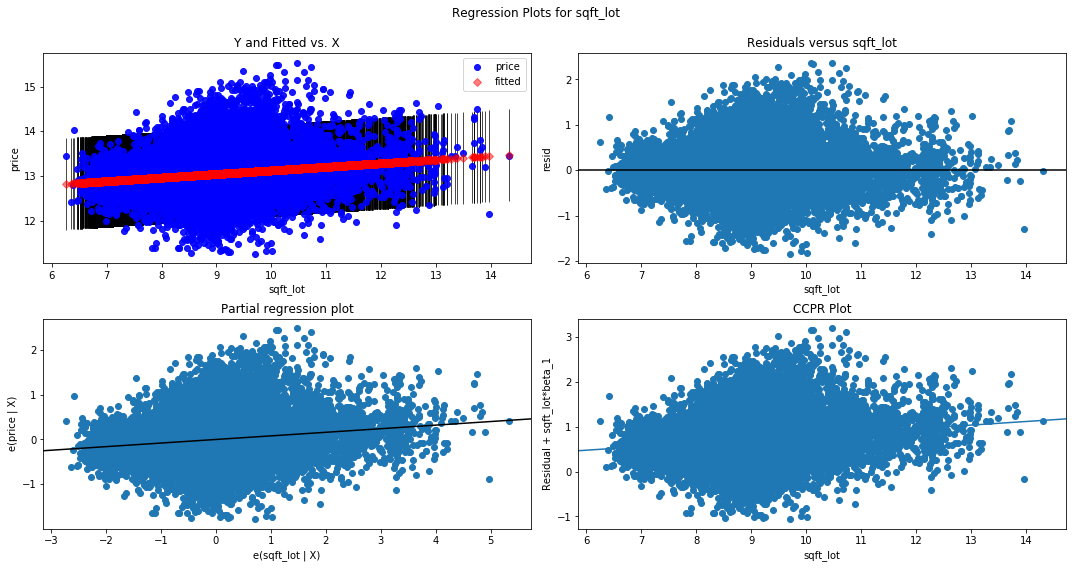

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


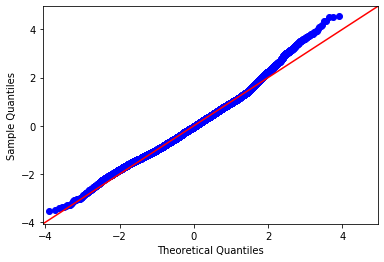

In [38]:
f = 'price~sqft_lot'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_lot': [housing_df.sqft_lot.min(), housing_df.sqft_lot.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_lot', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     415.7
Date:                Tue, 03 Dec 2019   Prob (F-statistic):           1.53e-91
Time:                        17:35:34   Log-Likelihood:                -16544.
No. Observations:               21594   AIC:                         3.309e+04
Df Residuals:                   21592   BIC:                         3.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3279      0.035    347.384      0.000      12.258      12.397
sqft_lot       0.0801      0.004     20.389      0.000       0.072       0.088
==============================================================================
Omnibus:                      560.086   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              665.022
Skew:                           0.347   Prob(JB):                    3.91e-145
Kurtosis:                       3.508   Cond. No.                         91.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squared: 0.09668459312270072
Intercept        12.941581
sqft_basement     0.000372
dtype: float64


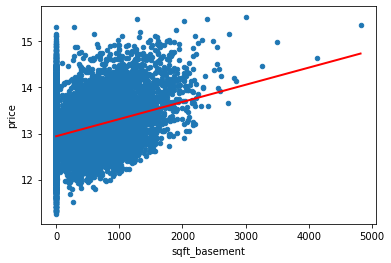

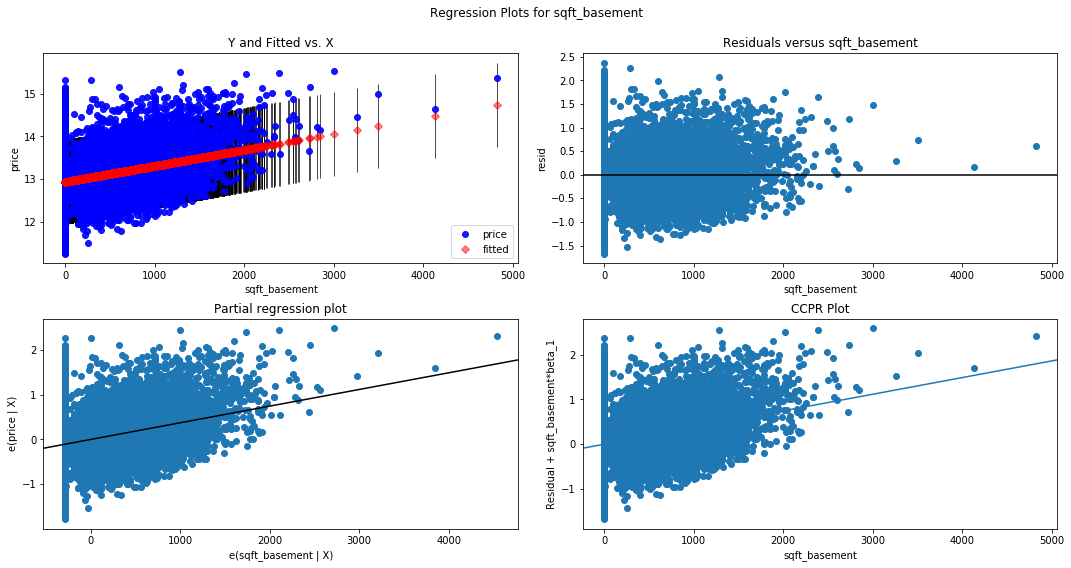

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


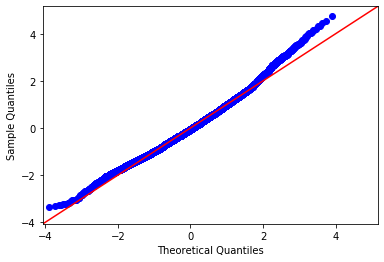

In [40]:
f = 'price~sqft_basement'
model = smf.ols(formula=f, data=housing_df).fit()
print ('R-Squared:',model.rsquared)
print (model.params)
X_new = pd.DataFrame({'sqft_basement': [housing_df.sqft_basement.min(), housing_df.sqft_basement.max()]});
preds = model.predict(X_new)
housing_df.plot(kind='scatter', x='sqft_basement', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2311.
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:36:28   Log-Likelihood:                -15653.
No. Observations:               21594   AIC:                         3.131e+04
Df Residuals:                   21592   BIC:                         3.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        12.9416      0.004   3191.672      0.000      12.934      12.950
sqft_basement     0.0004   7.74e-06     48.073      0.000       0.000       0.000
==============================================================================
Omnibus:                      575.061   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.692
Skew:                           0.370   Prob(JB):                    6.85e-143
Kurtosis:                       3.423   Cond. No.                         625.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multi Linear Regression

It seems like sqft_living factor has the strongest impact over housing price, so we will try some different conbinations with sqft_living and other factors

In [42]:
X = housing_df[['sqft_lot','sqft_above','sqft_basement',
                'floors_1.5', 'floors_2.0', 'floors_2.5', 'floors_3.0',
                'floors_3.5', 'bath_0.75', 'bath_1.0', 'bath_1.25', 'bath_1.5',
                'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75',
                'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0',
                'bath_4.25', 'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25',
                'bath_5.5', 'bath_5.75', 'bath_6.0', 'bath_6.25', 'bath_6.5',
                'bath_6.75', 'bath_7.5', 'bath_8.0', 'con_2', 'con_3',
                'con_4', 'con_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
                'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     641.2
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:36:32   Log-Likelihood:                -7038.7
No. Observations:               21594   AIC:                         1.418e+04
Df Residuals:                   21544   BIC:                         1.458e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2585      0.388     26.431      0.000       9.498      11.019
sqft_lot         -0.0414      0.003    -12.923      0.000      -0.048      -0.035
sqft_above        0.3378      0.011     30.126      0.000       0.316       0.360
sqft_basement     0.0003   6.66e-06     41.230      0.000       0.000       0.000
floors_1.5        0.1674      0.009     19.027      0.000       0.150       0.185
floors_2.0    -1.154e-05      0.008     -0.001      0.999      -0.016       0.016
floors_2.5        0.1433      0.028      5.166      0.000       0.089       0.198
floors_3.0        0.0708      0.016      4.342      0.000       0.039       0.103
floors_3.5        0.0956      0.127      0.751      0.453      -0.154       0.345
bath_0.75         0.3199      0.173      1.849      0.065      -0.019       0.659
bath_1.0          0.2309      0.168      1.374      0.169      -0.098       0.560
bath_1.25         0.2814      0.202      1.394      0.163      -0.114       0.677
bath_1.5          0.1715      0.168      1.019      0.308      -0.158       0.501
bath_1.75         0.2121      0.168      1.262      0.207      -0.117       0.542
bath_2.0          0.2024      0.168      1.203      0.229      -0.127       0.532
bath_2.25         0.1748      0.168      1.039      0.299      -0.155       0.505
bath_2.5          0.1275      0.168      0.758      0.448      -0.202       0.457
bath_2.75         0.1936      0.168      1.149      0.250      -0.137       0.524
bath_3.0          0.2068      0.169      1.226      0.220      -0.124       0.537
bath_3.25         0.2529      0.169      1.498      0.134      -0.078       0.584
bath_3.5          0.2122      0.169      1.257      0.209      -0.119       0.543
bath_3.75         0.3482      0.170      2.042      0.041       0.014       0.682
bath_4.0          0.2871      0.171      1.680      0.093      -0.048       0.622
bath_4.25         0.3178      0.173      1.840      0.066      -0.021       0.656
bath_4.5          0.2735      0.172      1.592      0.111      -0.063       0.610
bath_4.75         0.4202      0.183      2.298      0.022       0.062       0.778
bath_5.0          0.2921      0.184      1.588      0.112      -0.068       0.653
bath_5.25         0.3950      0.193      2.049      0.040       0.017       0.773
bath_5.5          0.4699      0.201      2.340      0.019       0.076       0.863
bath_5.75         0.2286      0.240      0.951      0.341      -0.242       0.700
bath_6.0          0.4231      0.220      1.926      0.054      -0.007       0.854
bath_6.25         0.5288      0.296      1.784      0.074      -0.052       1.110
bath_6.5          0.0395      0.292      0.135      0.892      -0.533       0.612
bath_6.75        -0.4468      0.293     -1.526      0.127      -1.021       0.127
bath_7.5          0.1332      0.376      0.355   

### Adjust the model

Remove few factors that have p value greater than 0.05 and re-fit the model

In [43]:
X = housing_df[['sqft_lot', 'sqft_above', 'floors_1.5', 'floors_2.0', 'floors_3.0',
                'bath_1.5', 'bath_1.75', 'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75',
                'bath_3.0', 'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25', 
                'bath_4.5', 'bath_4.75', 'bath_5.0', 'bath_5.25', 'bath_5.5', 'bath_6.0',
                'con_2', 'con_4', 'con_5','grade_8', 'grade_9', 'grade_10', 'grade_11', 
                'grade_12', 'grade_13']]
y = housing_df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     802.8
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:36:36   Log-Likelihood:                -8279.2
No. Observations:               21594   AIC:                         1.662e+04
Df Residuals:                   21561   BIC:                         1.689e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0977      0.069    160.276      0.000      10.962      11.233
sqft_lot      -0.0478      0.003    -14.383      0.000      -0.054      -0.041
sqft_above     0.2756      0.011     25.164      0.000       0.254       0.297
floors_1.5     0.1386      0.009     14.995      0.000       0.121       0.157
floors_2.0    -0.1199      0.008    -15.351      0.000      -0.135      -0.105
floors_3.0    -0.0934      0.017     -5.605      0.000      -0.126      -0.061
bath_1.5       0.0678      0.011      6.074      0.000       0.046       0.090
bath_1.75      0.1416      0.009     15.726      0.000       0.124       0.159
bath_2.0       0.1217      0.010     11.794      0.000       0.101       0.142
bath_2.25      0.1599      0.011     14.617      0.000       0.138       0.181
bath_2.5       0.1108      0.010     10.915      0.000       0.091       0.131
bath_2.75      0.2198      0.013     16.574      0.000       0.194       0.246
bath_3.0       0.2535      0.015     16.364      0.000       0.223       0.284
bath_3.25      0.3269      0.018     18.347      0.000       0.292       0.362
bath_3.5       0.3029      0.017     17.900      0.000       0.270       0.336
bath_3.75      0.4247      0.031     13.820      0.000       0.365       0.485
bath_4.0       0.4027      0.033     12.290      0.000       0.338       0.467
bath_4.25      0.4956      0.042     11.750      0.000       0.413       0.578
bath_4.5       0.4030      0.038     10.626      0.000       0.329       0.477
bath_4.75      0.6184      0.076      8.159      0.000       0.470       0.767
bath_5.0       0.4443      0.079      5.624      0.000       0.289       0.599
bath_5.25      0.5436      0.100      5.440      0.000       0.348       0.739
bath_5.5       0.5625      0.116      4.853      0.000       0.335       0.790
bath_6.0       0.7423      0.149      4.976      0.000       0.450       1.035
con_2         -0.1523      0.028     -5.510      0.000      -0.206      -0.098
con_4          0.0873      0.006     14.692      0.000       0.076       0.099
con_5          0.2101      0.009     22.290      0.000       0.192       0.229
grade_8        0.2719      0.007     40.555      0.000       0.259       0.285
grade_9        0.5595      0.010     57.335      0.000       0.540       0.579
grade_10       0.7897      0.014     57.734      0.000       0.763       0.817
grade_11       0.9988      0.021     46.763      0.000       0.957       1.041
grade_12       1.3159      0.041     32.024      0.000       1.235       1.396
grade_13       1.6076      0.111     14.535      0.000       1.391       1.824
==============================================================================
Omnibus:                       15.734   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.589
Sk

### Q3 summary

In summary, grade and sqft_above have stronger impacts on housing price, and quite few variables has strong multicollinearity with other variables. Hence it will be helpful to reduce the factors during the initial investigation process.
<br>
We suggest to remove sqft_basement, sqft_living and bedrooms, these are the features that have high collinearity with other features.
In general, our multi linear regression model indicates that internal features have a quite high coefficient(0.55) value with housing price, which means as a property advisor we should believe internal features are important.